In [1]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score

tf.random.set_seed(678)

# Training and test data

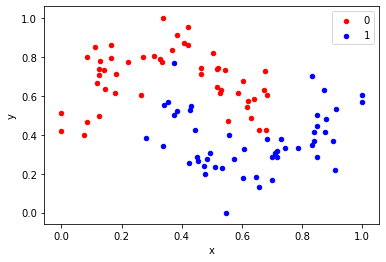

In [2]:
train_X, train_y = make_moons(n_samples=100, noise=0.2, random_state=1)
scaler = MinMaxScaler()
train_X_norm = scaler.fit_transform(train_X)

# scatter plot, dots colored by class value
df_train = DataFrame(dict(x=train_X_norm[:,0], y=train_X_norm[:,1], label=train_y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df_train.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

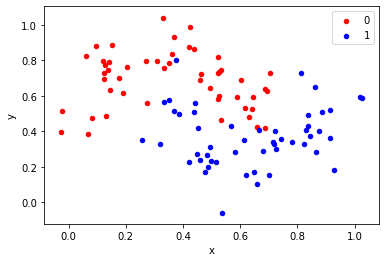

In [3]:
test_X, test_y = make_moons(n_samples=100, noise=0.25, random_state=1)
test_X_norm = scaler.transform(test_X)

# scatter plot, dots colored by class value
df_test = DataFrame(dict(x=test_X_norm[:,0], y=test_X_norm[:,1], label=test_y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df_test.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

# Train and test

In [ ]:
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=2))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(train_X_norm, train_y, epochs=100, batch_size=8, verbose=1)

In [ ]:
pred_y = model.predict(test_X_norm,batch_size=4)
pred_y_round = np.around((pred_y[:,0]))

print('Acuracy: ', accuracy_score(test_y, pred_y_round))
print('F1 acuracy: ', f1_score(test_y, pred_y_round))

In [ ]:
df_pred = DataFrame(dict(x=test_X_norm[:,0], y=test_X_norm[:,1], label=pred_y_round))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df_pred.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()